## Project

***

The task of this project is to create a we service that uses machine learning to make predictions based on the data set powerproduction.csv 

The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. The web service should respond with predicted power values based on speed values sent as HTTP requests. 

In [18]:
# Numerical arrays
import numpy as np

# read a csv file and organise our data
import pandas as pd

# Machine Learning - KMeans
#from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.neural_network as sknn
#from sklearn import function to split the dataset into train & test sets
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
#from sklearn import performance metrics to evaluate predictions
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#import sklearn.cluster as skcl

# Plotting & visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Read the powerproduction.csv from a file
df = pd.read_csv('powerproduction.csv')

# summarize the shape of the dataset
print(df.shape)

(500, 2)


The powerproduction dataset contains 500 rows and 2 columns.  Now we split the dataset into input (x) and output (y) columns. 

In [4]:
x = df.iloc[:, 0].values 
y = df.iloc[:, 1].values

Let's look at the data visualization:

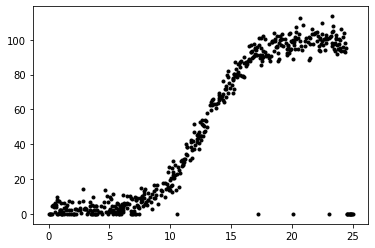

In [5]:
plt.plot(x, y, 'k.')

As we can see from the graph above, some records have 0 value for power. Therefore we're going to remove them from the dataset.

In [6]:
# removing all rows where the power data is not maintained (equals 0.0)
df = df[df['power'] !=0]

In [7]:
df.shape

(451, 2)

As we can see, 49 records had been removed from the itial dataset.

In [8]:
# updating x & y arrays.
x = df.iloc[:, 0].values 
y = df.iloc[:, 1].values

Let's plot it.

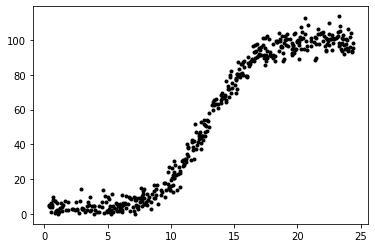

In [9]:
plt.plot(x, y, 'k.')

Now we can visually check that all zero values are not on the graph.

Let's call the function passing both arrays and have them split appropriately into train and test subsets.

In [10]:
# splitting the dataset into train & test sets (70% train & 30% test)
# to have rows assigned to the train and test sets randomly random_state is used
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

Let's check the size of the train and test sets. The train sets contains 315 records and for test will be used 136.

In [11]:
print(x_train.shape, x_test.shape,y_train.shape, y_test.shape)

(315,) (136,) (315,) (136,)


## Decision Trees (Classification and Reression Trees: CART)

We will now create a CART regression model using the DecisionTreeRegressor class. The arguments used are max_depth, which indicates the maximum depth of the tree, and min_samples_leaf, that indicates the minimum number of samples required to be at a leaf node.

In [15]:
# reshaping models to get 2D arrays instead of 1D
X_train = x_train.reshape(-1,1)
X_test = x_test.reshape(-1,1)

In [51]:
# fitting the model
model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=0.15, random_state=3)
model.fit(X_train, y_train)

# make predictions on the training set
y_pred_train = model.predict(X_train)

# make predictions on the testing set
y_pred_test = model.predict(X_test)

# evaluating the model (train set)
RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False)
R2_train = r2_score(y_train, y_pred_train)

# evaluating the model (test set)
RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False)
R2_test = r2_score(y_test, y_pred_test)

# printing results:
print ('Training set - RMSE: %.3f' % RMSE_train, 'R-squared: %.3f' % R2_train)
print ('Testing set - RMSE: %.3f' % RMSE_test, 'R-squared: %.3f' % R2_test)

Training set - RMSE: 7.152 R-squared: 0.969
Testing set - RMSE: 8.866 R-squared: 0.951


The above output shows that the RMSE is 7.152 for train data and 8.866 for test data. On the other hand, the R-squared value is 96.9% for train data and 95.1%  for test data. These are quite good numbers, but more improvement can be done by parameter tuning. We will be changing the values of the parameter, 'min_samples_leaf', to see how that affects the model performance.

In [52]:
# fitting the model
model_a = DecisionTreeRegressor(max_depth=10, min_samples_leaf=0.05, random_state=3)
model_b = DecisionTreeRegressor(max_depth=10, min_samples_leaf=0.25, random_state=3)
model_a.fit(X_train, y_train)
model_b.fit(X_train, y_train)

# make predictions on the training set
y_pred_train_a = model_a.predict(X_train)
y_pred_train_b = model_b.predict(X_train)

# make predictions on the testing set
y_pred_test_a = model_a.predict(X_test)
y_pred_test_b = model_b.predict(X_test)

The code below generates the evaluation metrics - RMSE and R-squared - for the first regression tree "model A":

In [53]:
# evaluating the model (train set)
RMSE_train_a = mean_squared_error(y_train, y_pred_train_a, squared=False)
R2_train_a = r2_score(y_train, y_pred_train_a)

# evaluating the model (test set)
RMSE_test_a = mean_squared_error(y_test, y_pred_test_a, squared=False)
R2_test_a = r2_score(y_test, y_pred_test_a)

# printing results:
print ('Training set A - RMSE: %.3f' % RMSE_train_a, 'R-squared: %.3f' % R2_train_a)
print ('Testing set A - RMSE: %.3f' % RMSE_test_a, 'R-squared: %.3f' % R2_test_a)

Training set A - RMSE: 4.225 R-squared: 0.989
Testing set A - RMSE: 5.119 R-squared: 0.984


The code below generates the evaluation metrics - RMSE and R-squared - for the first regression tree "model B":

In [54]:
# evaluating the model (train set)
RMSE_train_b = mean_squared_error(y_train, y_pred_train_b, squared=False)
R2_train_b = r2_score(y_train, y_pred_train_b)

# evaluating the model (test set)
RMSE_test_b = mean_squared_error(y_test, y_pred_test_b, squared=False)
R2_test_b = r2_score(y_test, y_pred_test_b)

# printing results:
print ('Training set B - RMSE: %.3f' % RMSE_train_b, 'R-squared: %.3f' % R2_train_b)
print ('Testing set B - RMSE: %.3f' % RMSE_test_b, 'R-squared: %.3f' % R2_test_b)

Training set B - RMSE: 11.772 R-squared: 0.916
Testing set B - RMSE: 11.746 R-squared: 0.915


As we can see from the output of RMSE & R-squared the model B is under-performing the model A. Howewer if we compare model A to the initial model, we can see that the train and test RMSE came down to 4.225 and 5.11, respectively. The R-squared value for the train and test set increases to 98.9% and 98.4%, respectively. This shows that the regression tree model with 'min_samples_leaf' parameter of 0.05 is performing better, demonstrating how parameter tuning can improve the model performance.

## Random Forest

Decision Trees are useful, but the problem is that they often tend to overfit the training data leading to high variances in the test data. Random Forest algorithms overcome this shortcoming by reducing the variance of the decision trees.

In [56]:
# fitting the model
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train)

# make predictions on the training set
y_pred_train_rf = model_rf.predict(X_train)

# make predictions on the testing set
y_pred_test_rf = model_rf.predict(X_test)

# evaluating the model (train set)
RMSE_train_rf = mean_squared_error(y_train, y_pred_train_rf, squared=False)
R2_train_rf = r2_score(y_train, y_pred_train_rf)

# evaluating the model (test set)
RMSE_test_rf = mean_squared_error(y_test, y_pred_test_rf, squared=False)
R2_test_rf = r2_score(y_test, y_pred_test_rf)

# printing results:
print ('Training set - RMSE: %.3f' % RMSE_train_rf, 'R-squared: %.3f' % R2_train_rf)
print ('Testing set - RMSE: %.3f' % RMSE_test_rf, 'R-squared: %.3f' % R2_test_rf)

Training set - RMSE: 1.800 R-squared: 0.998
Testing set - RMSE: 4.983 R-squared: 0.985


The above output shows that the RMSE and R-squared values on the training data is 1.8 and 99.8%, respectively. For the test data, the result for these metrics is 4.983 and 98.5%, respectively. The performance of the Random Forest model is higher comparing to the Decision Tree models built earlier.

## RandomForestRegressor

In [13]:
# reshaping models to get 2D arrays instead of 1D
X_train = x_train.reshape(-1,1)
X_test = x_test.reshape(-1,1)

Now we can then define and fit the model on the training dataset.

In [17]:
# fitting the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

#evaluate predictions
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)

MAE: 3.711


the model was evaluated on the test set and the performance of the model when making predictions on new data is a mean absolute error of about 3.649 

(thousands of dollars).

In [16]:
pred = model.predict([[24.399]])
print(pred)

[95.82043]


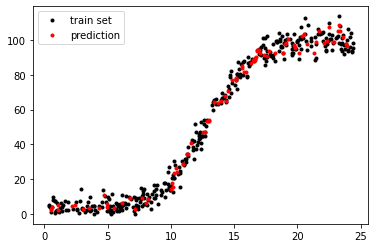

In [18]:
# Now let's see on the graph.
plt.plot(x_train, y_train, 'k.', label='train set')
plt.plot(x_test, y_pred,'r.', label='prediction')
plt.legend();

### Neural Network

In [ ]:
#Train the neiral network
regr = sknn.MLPRegressor(max_iter=10000).fit(df, Y)

#show predictions
np.array([Y, regr.predict(df)]).T

In [ ]:
# The score
regr.score(df, Y)